<a href="https://colab.research.google.com/github/Dly27/var-calculations/blob/main/VaR_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alpha_vantage

In [ ]:
import numpy as np
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


ALPHA_VANTAGE_KEY = " OZE5HMBKDPQZ8UPA"

In [ ]:
def fetch_stock_data(symbol, start_date, end_date):
    ts = TimeSeries(key=ALPHA_VANTAGE_KEY, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    data = data[(data.index >= start_date) & (data.index <= end_date)]
    return data

def prepare_data(data):
    data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    data = data.dropna()
    data = data.sort_index(ascending=True)
    data["Return"] = data["Close"].pct_change()

    return data



              Open    High     Low   Close       Volume    Return
date                                                             
2010-01-04  112.37  113.39  111.51  113.33  118857369.0       NaN
2010-01-05  113.26  113.68  112.85  113.63  111519230.0  0.002647
2010-01-06  113.52  113.99  113.43  113.71  116017127.0  0.000704
2010-01-07  113.50  114.33  113.18  114.19  130502017.0  0.004221
2010-01-08  113.89  114.62  113.66  114.57  126357911.0  0.003328
              Open    High     Low   Close       Volume    Return
date                                                             
2010-01-04  112.37  113.39  111.51  113.33  118857369.0       NaN
2010-01-05  113.26  113.68  112.85  113.63  111519230.0  0.002647
2010-01-06  113.52  113.99  113.43  113.71  116017127.0  0.000704
2010-01-07  113.50  114.33  113.18  114.19  130502017.0  0.004221
2010-01-08  113.89  114.62  113.66  114.57  126357911.0  0.003328


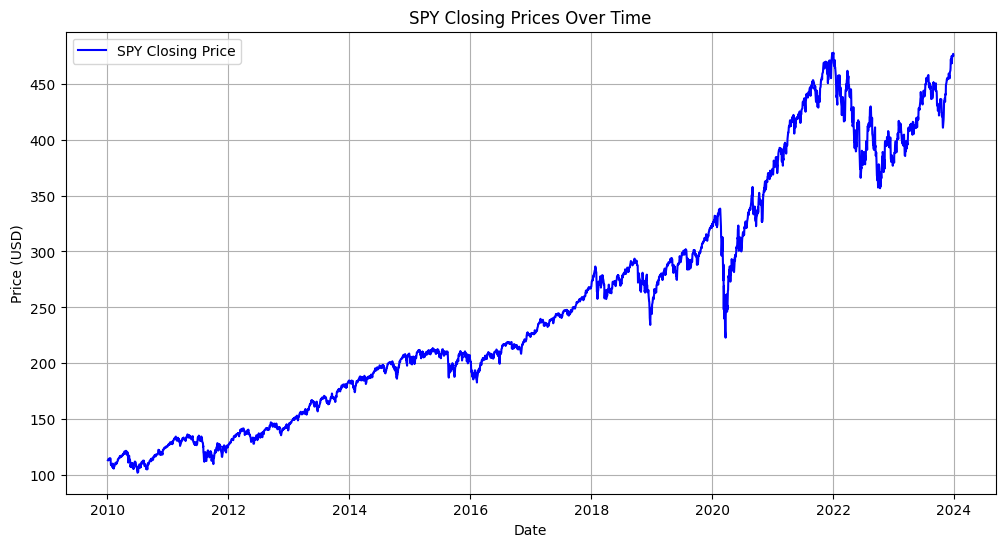

In [ ]:
data = fetch_stock_data("SPY", "2010-01-01", "2024-01-01")
data = prepare_data(data)

print(data.head())

def plot_spy_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='SPY Closing Price', color='blue')
    plt.title('SPY Closing Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()


data = fetch_stock_data("SPY", "2010-01-01", "2024-01-01")
data = prepare_data(data)

print(data.head())
plot_spy_data(data)

**Historical VaR**

In [ ]:
def historical_var(data):
    var_95 = data["Return"].quantile(0.05)
    var_99 = data["Return"].quantile(0.01)
    var_99_99 = data["Return"].quantile(0.001)

    print("95% VaR:", var_95)
    print("99% VaR:", var_99)
    print("99.99% VaR:", var_99_99)

historical_var(data)

95% VaR: -0.01670734886366332
99% VaR: -0.03158514511940933
99.99% VaR: -0.061236590026711474


**Variance-Covariance VaR**

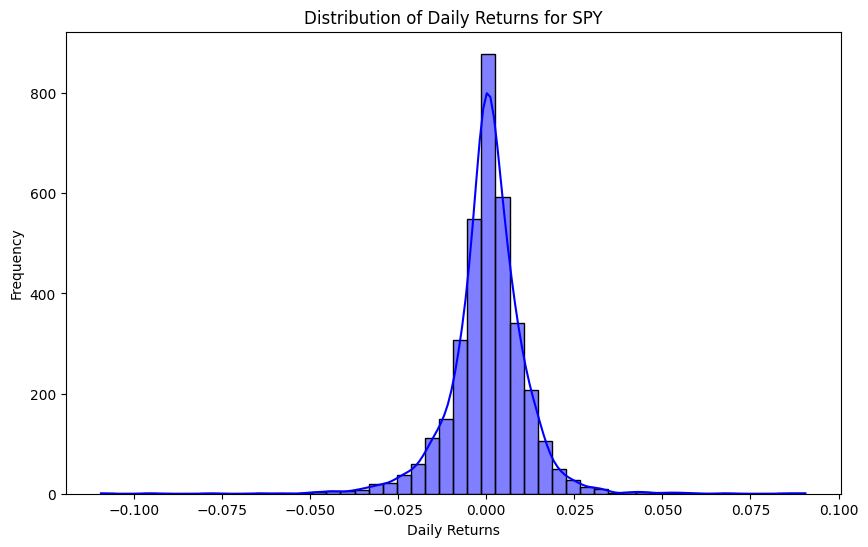

In [ ]:
def distribution_returns_plot(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Return'].dropna(), kde=True, bins=50, color='blue')
    plt.title('Distribution of Daily Returns for SPY')
    plt.xlabel('Daily Returns')
    plt.ylabel('Frequency')
    plt.show()

distribution_returns_plot(data)

In [ ]:
def variance_covariance_var(data):
    mean_return = data["Return"].mean()
    std_dev = data["Return"].std()
    z_score = norm.ppf(0.05)

    var_vc = mean_return + z_score * std_dev
    print("Variance-Covariance VaR (95%):", var_vc)

variance_covariance_var(data)

Variance-Covariance VaR (95%): -0.01755507005773102


**Monte Carlo Simulation VaR**

Monte Carlo Simulation VaR (95%): -0.017338755263195095
Monte Carlo Simulation VaR (99%): -0.024934691040547644
Monte Carlo Simulation VaR (99.99%): -0.033495448943117456


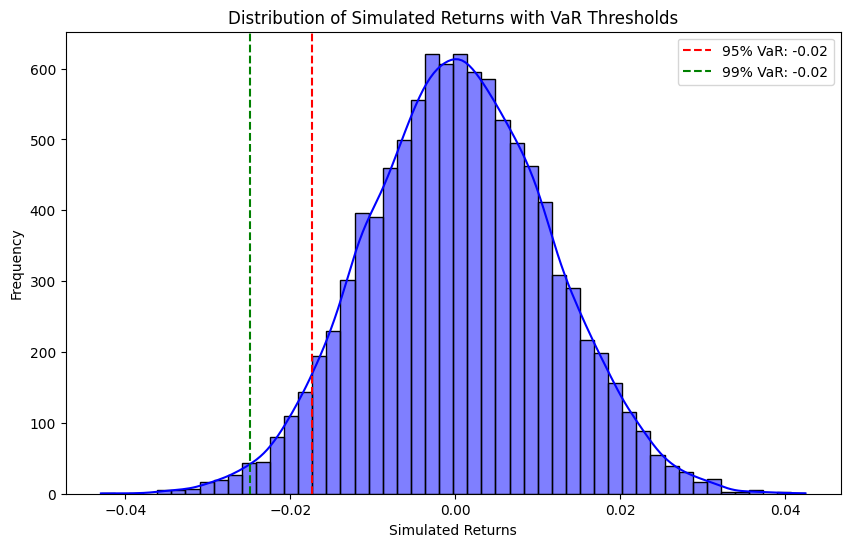

In [ ]:
def monte_carlo_var(data, simulations):
    time_horizon = 1 # days
    mean_return = data["Return"].mean()
    std_dev = data["Return"].std()
    z_score = norm.ppf(0.05)


    simulated_returns = np.random.normal(mean_return, std_dev, simulations)

    var_95 = np.percentile(simulated_returns, 5)
    var_99 = np.percentile(simulated_returns, 1)
    var_99_99 = np.percentile(simulated_returns, 0.1)

    print("Monte Carlo Simulation VaR (95%):", var_95)
    print("Monte Carlo Simulation VaR (99%):", var_99)
    print("Monte Carlo Simulation VaR (99.99%):", var_99_99)

    plt.figure(figsize=(10, 6))
    sns.histplot(simulated_returns, bins=50, kde=True, color='blue')

    plt.axvline(var_95, color='red', linestyle='--', label=f'95% VaR: {var_95:.2f}')
    plt.axvline(var_99, color='green', linestyle='--', label=f'99% VaR: {var_99:.2f}')

    plt.title('Distribution of Simulated Returns with VaR Thresholds')
    plt.xlabel('Simulated Returns')
    plt.ylabel('Frequency')
    plt.legend()

    plt.show()

monte_carlo_var(data, 10000)
